In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


df = pd.read_csv('defunciones_covid19_2020_2024.csv', sep=';')
print(df)


        AÑO   FECHA_DEF SEXO_NOMBRE  EDAD_TIPO  EDAD_CANT  COD_COMUNA  \
0      2020  2020-12-31       Mujer          1         99        7101   
1      2020  2020-03-20      Hombre          1         64       13102   
2      2020  2020-03-21       Mujer          1         82       13128   
3      2020  2020-03-25      Hombre          1         82        8101   
4      2020  2020-03-26      Hombre          1         79        8112   
...     ...         ...         ...        ...        ...         ...   
62818  2024  2024-02-15      Hombre          1         73       13119   
62819  2024  2024-02-12      Hombre          1         84       12101   
62820  2024  2024-02-22       Mujer          1         97        9103   
62821  2024  2024-02-25       Mujer          1         49        8102   
62822  2024  2024-02-25       Mujer          1         75       13112   

             COMUNA                            NOMBRE_REGION DIAG1  \
0             Talca                                De

Los datos a analizar del siguiente csv son las defunciones por covid desde 2020 hasta la fecha, tal como se indica en el link de abajo, donde se describe lo siguiente: 
'Se consideran para la confección de este conjunto de datos los registros en estado cerrado (que no registrarán cambios) del año 2020 y los registros preliminares (en proceso de recolección y validación) de los años 2021 a 2024.'

El origen de los datos son datos oficiales expuestos por el ministerio de salud de manera publica para notificar los fallecidos hasta el presente por covid, dando dicha informacion en el csv donde los datos de las personas fallecidas estan de forma anonima para resguardar la identidad, pero con su respectiva edad, sexo y region entre otros datos.

Las columnas denteo del csv utilizadas son :
Año, fecha de defuncion, sexo, edad, comuna

Link de donde se extraen los datos del csv: https://datos.gob.cl/dataset/defunciones-por-covid19

1) El primer grafico(barra)indica la cantidad de defunciones por region hasta la fecha por covid
2) El segundo grafico muestra la cantidad de fallecidos por comunas en la region metropolitana, ya que es la region con mas fallecidos
    y se puede ver de mejor manera como fue la distribucion.
3) El tercer grafico(de lineas) muestra la cantidad defunciones por año, tomando en cuenta la mitad del año igual (mes de junio).
4) El cuarto grafico(torta) muestra una proporcion por sexo del numero de difunciones por covid en los primeros 4 años de pandemia(2020-2023) se incluye todo 2023.
5) El quinto grafico(linea) muestra el numero de difunciones por covid por edad 
6) El sexto grafico(poligono) muestra las muertes por año en la ciudad de Valdivia
7) El septimo grafico(torta) muestra el porcentaje de muertes por sexo en los primeros 4 años de pandemia



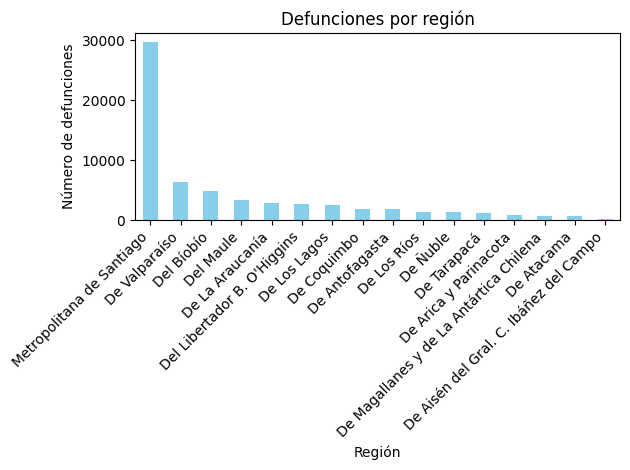

In [2]:
#Defunciones por region
df_filtrado = df[df['NOMBRE_REGION'] != 'Ignorada']
defunciones_por_region = df_filtrado['NOMBRE_REGION'].value_counts()
defunciones_por_region = defunciones_por_region.sort_values(ascending=False)
defunciones_por_region.plot(kind='bar', color='skyblue')

plt.title('Defunciones por región')
plt.xlabel('Región')
plt.ylabel('Número de defunciones')


plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()



In [4]:
#Fallecidos comunas region metropolitana
max_deaths_year = df[df['NOMBRE_REGION'] == 'Metropolitana de Santiago']['AÑO'].value_counts().idxmax()


max_deaths_all_years = df[df['AÑO'] == max_deaths_year]['COMUNA'].value_counts().max()


def update_bar_plot(year):
    df_year = df[df['AÑO'] == year]
    df_rm = df_year[df_year['NOMBRE_REGION'] == 'Metropolitana de Santiago']
    fallecidos_por_comuna = df_rm['COMUNA'].value_counts()
    
    plt.figure(figsize=(10, 6))
    fallecidos_por_comuna.plot(kind='bar')
    plt.title(f'Fallecidos por COVID-19 por comuna en la Región Metropolitana - Año {year}')
    plt.xlabel('Comuna')
    plt.ylabel('Número de Fallecidos')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, max_deaths_all_years * 1.1)  # Establecer el límite superior del eje y basado en el máximo de muertes de todos los años
    plt.tight_layout()
    plt.show()


def update_pie_plot(year):
    df_year = df[df['AÑO'] == year]
    df_rm = df_year[df_year['NOMBRE_REGION'] == 'Metropolitana de Santiago']
    fallecidos_por_comuna = df_rm['COMUNA'].value_counts()
    
    plt.figure(figsize=(10, 10))
    fallecidos_por_comuna.plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Fallecidos por COVID-19 por comuna en la Región Metropolitana - Año {year}')
    plt.ylabel('')
    plt.axis('equal') 
    plt.xlim(-1.5, 1.5)  
    plt.ylim(-1.5, 1.5)  
    plt.tight_layout()
    plt.show()


years_available = df['AÑO'].unique()

year_dropdown = widgets.Dropdown(options=years_available, description='Año:', disabled=False)


plot_type_dropdown = widgets.Dropdown(options=['Barras', 'Torta'], description='Tipo de Gráfico:', disabled=False)


def update_plot(year, plot_type):
    if plot_type == 'Barras':
        update_bar_plot(year)
    elif plot_type == 'Torta':
        update_pie_plot(year)

widgets.interactive(update_plot, year=year_dropdown, plot_type=plot_type_dropdown)

interactive(children=(Dropdown(description='Año:', options=(2020, 2021, 2022, 2023, 2024), value=2020), Dropdo…

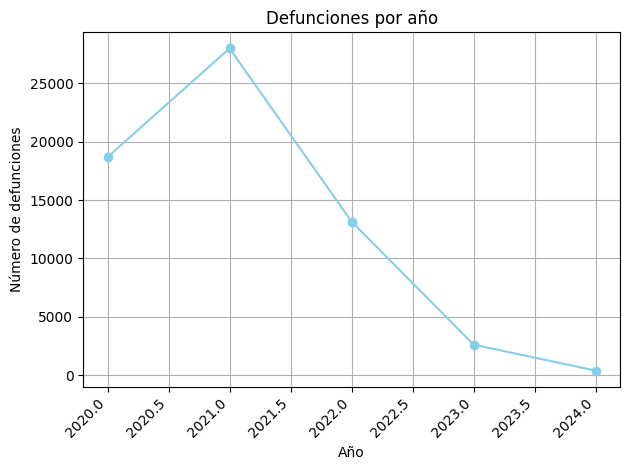

In [10]:
#Defunciones por año
defunciones_por_año = df['AÑO'].value_counts().sort_index()

plt.plot(defunciones_por_año.index, defunciones_por_año.values, marker='o', color='skyblue', linestyle='-')


plt.title('Defunciones por año')
plt.xlabel('Año')
plt.ylabel('Número de defunciones')

plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.grid(True)  
plt.show()


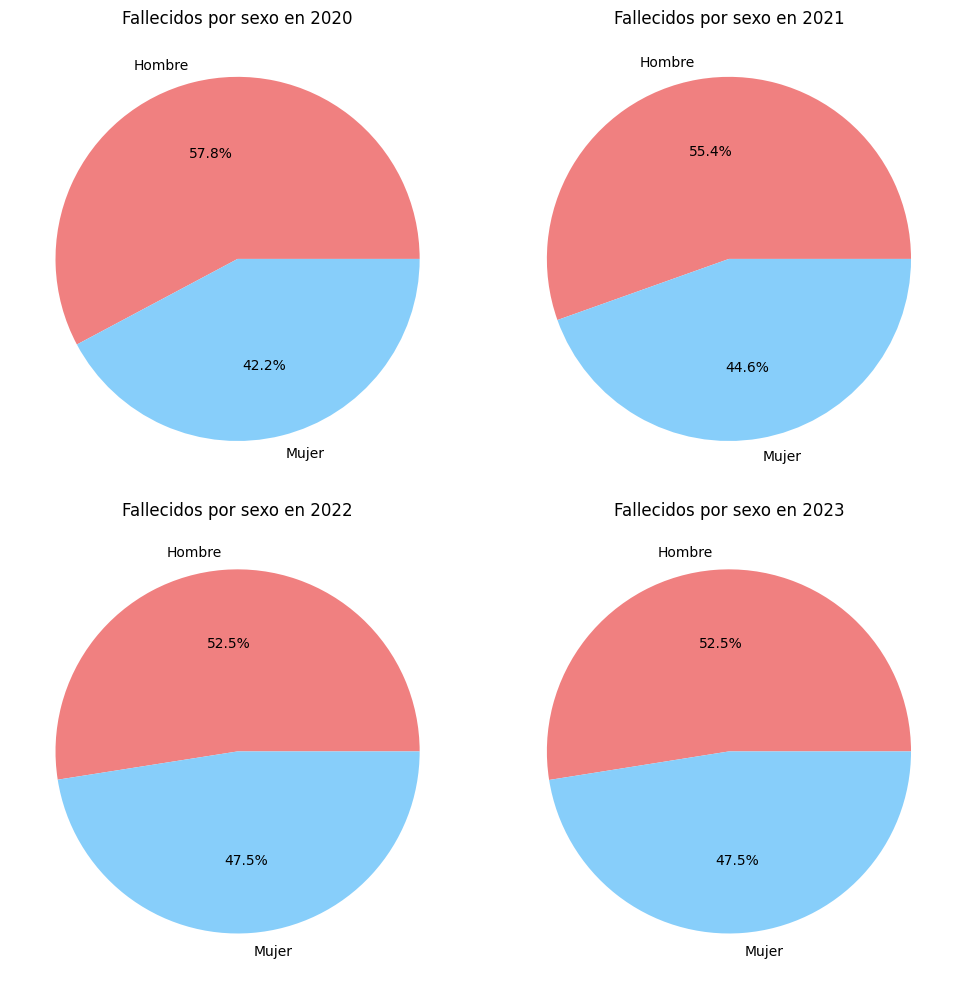

In [20]:
#Defunciones por año segun sexo
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, año in enumerate(range(2020, 2024)):
    df_año = df[df['AÑO'] == año]
    fallecidos_por_sexo = df_año['SEXO_NOMBRE'].value_counts()
    axs[i // 2, i % 2].pie(fallecidos_por_sexo, labels=fallecidos_por_sexo.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
    axs[i // 2, i % 2].set_title(f'Fallecidos por sexo en {año}')
    axs[i // 2, i % 2].set_ylabel('')
    
plt.tight_layout()

plt.show()

In [3]:
#Defunciones por edad
max_deaths_year = df['AÑO'].value_counts().idxmax()

df_max_deaths_year = df[df['AÑO'] == max_deaths_year]

max_deaths = df_max_deaths_year['EDAD_CANT'].value_counts().max()

def update_line_plot(year):
    df_year = df[df['AÑO'] == year]
    defunciones_por_edad = df_year['EDAD_CANT'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    defunciones_por_edad.plot()
    plt.title(f'Distribución de defunciones por edad - Año {year}')
    plt.xlabel('Edad')
    plt.ylabel('Número de defunciones')
    plt.ylim(0, max_deaths * 1.1)
    plt.show()

years_available = df['AÑO'].unique()

year_dropdown_line = widgets.Dropdown(options=years_available, description='Año:', disabled=False)

widgets.interactive(update_line_plot, year=year_dropdown_line)


display(widgets.VBox([year_dropdown_line, widgets.interactive_output(update_line_plot, {'year': year_dropdown_line})]))

In [7]:
#Defunciones por año region de Valdivia
df_valdivia = df[df['COMUNA'] == 'Valdivia']

max_deaths_sex = df_valdivia['SEXO_NOMBRE'].value_counts().idxmax()


df_max_deaths_sex = df_valdivia[df_valdivia['SEXO_NOMBRE'] == max_deaths_sex]


max_deaths_count = df_max_deaths_sex.shape[0]


def update_polygon_plot(sexo):
    if sexo == 'Ambos':
        df_valdivia_sexo = df_valdivia
    else:
        df_valdivia_sexo = df_valdivia[df_valdivia['SEXO_NOMBRE'] == sexo]
    
    muertes_por_año = df_valdivia_sexo['AÑO'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(muertes_por_año.index, muertes_por_año.values, color='skyblue', alpha=0.5)
    plt.plot(muertes_por_año.index, muertes_por_año.values, color='blue', alpha=0.7)
    plt.title(f'Muertes en la ciudad de Valdivia por año - Sexo: {sexo}')
    plt.xlabel('Año')
    plt.ylabel('Número de muertes')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.ylim(0, max_deaths_count * 1.1) 
    plt.show()


sexos_disponibles = df_valdivia['SEXO_NOMBRE'].unique().tolist()
sexos_disponibles.append('Ambos')

sexo_dropdown_polygon = widgets.Dropdown(options=sexos_disponibles, description='Sexo:', disabled=False)

widgets.interactive(update_polygon_plot, sexo=sexo_dropdown_polygon)

display(widgets.VBox([sexo_dropdown_polygon, widgets.interactive_output(update_polygon_plot, {'sexo': sexo_dropdown_polygon})]))

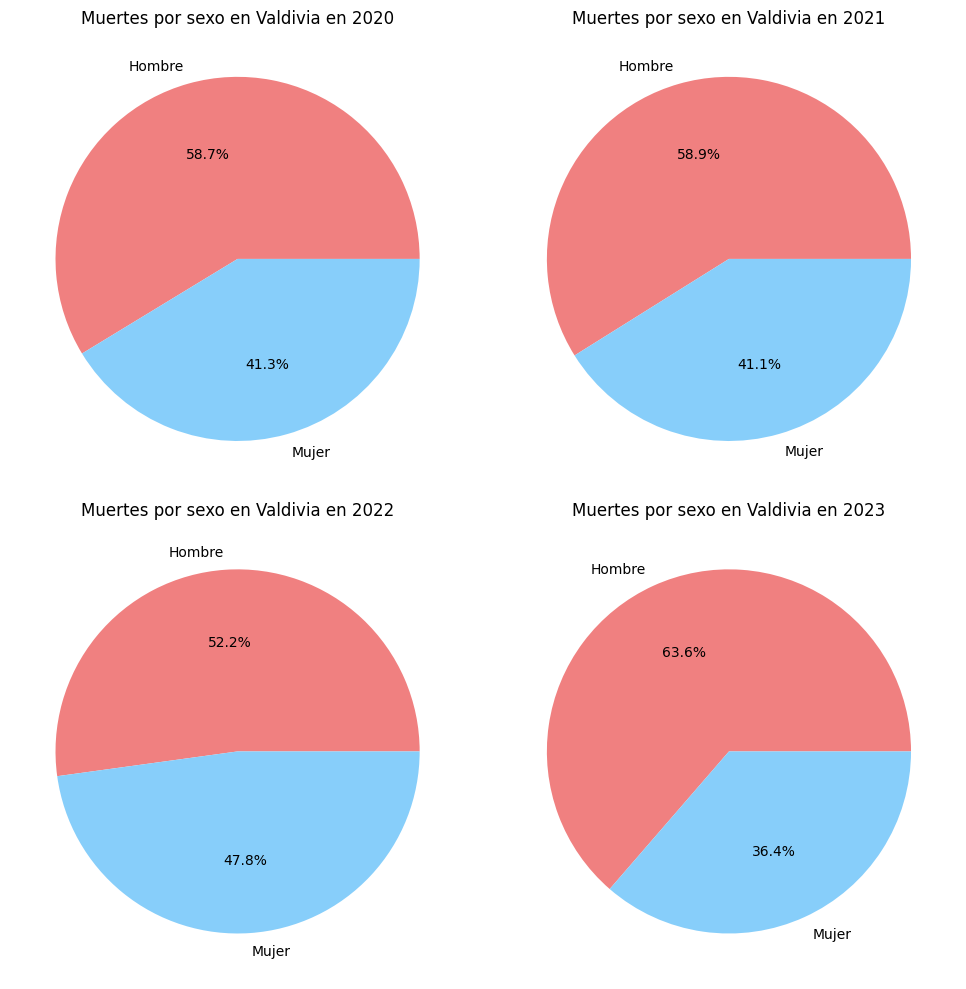

In [4]:
#Defunciones segun el sexo en Valdivia
df_valdivia = df[df['COMUNA'] == 'Valdivia']


fig, axs = plt.subplots(2, 2, figsize=(10, 10))


for i, año in enumerate(range(2020, 2024)):
    df_año = df_valdivia[df_valdivia['AÑO'] == año]
    muertes_por_sexo = df_año['SEXO_NOMBRE'].value_counts()
    axs[i // 2, i % 2].pie(muertes_por_sexo, labels=muertes_por_sexo.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
    axs[i // 2, i % 2].set_title(f'Muertes por sexo en Valdivia en {año}')
    axs[i // 2, i % 2].set_ylabel('')


plt.tight_layout()

plt.show()

In [3]:
max_deaths_count = df.shape[0]

def update_polygon_plot(sexo):
    if sexo == 'Ambos':
        df_sexo = df
    else:
        df_sexo = df[df['SEXO_NOMBRE'] == sexo]
    
    muertes_por_año = df_sexo['AÑO'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(muertes_por_año.index, muertes_por_año.values, color='skyblue', alpha=0.5)
    plt.plot(muertes_por_año.index, muertes_por_año.values, color='blue', alpha=0.7)
    plt.title(f'Muertes por año - Sexo: {sexo}')
    plt.xlabel('Año')
    plt.ylabel('Número de muertes')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    
    # etiquetas
    for x, y in zip(muertes_por_año.index, muertes_por_año.values):
        plt.text(x, y, f'{y}', ha='center', va='bottom')
    
    plt.ylim(0, max_deaths_count * 1.1) 
    plt.show()


sexos_disponibles = df['SEXO_NOMBRE'].unique().tolist()
sexos_disponibles.append('Ambos')

sexo_dropdown_polygon = widgets.Dropdown(options=sexos_disponibles, description='Sexo:', disabled=False)

widgets.interactive(update_polygon_plot, sexo=sexo_dropdown_polygon)

display(widgets.VBox([sexo_dropdown_polygon, widgets.interactive_output(update_polygon_plot, {'sexo': sexo_dropdown_polygon})]))